<a href="https://colab.research.google.com/github/shuvad23/Deep-learning-with-PyTorch/blob/main/ANN_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧠 What is ANN (Artificial Neural Network)?

- An Artificial Neural Network (ANN) is a machine learning model inspired by how the human brain works.
It learns patterns from data by connecting many simple processing units called neurons.

🔹 Simple Definition

- An ANN is a system of connected neurons arranged in layers that can learn from data and make predictions or decisions.




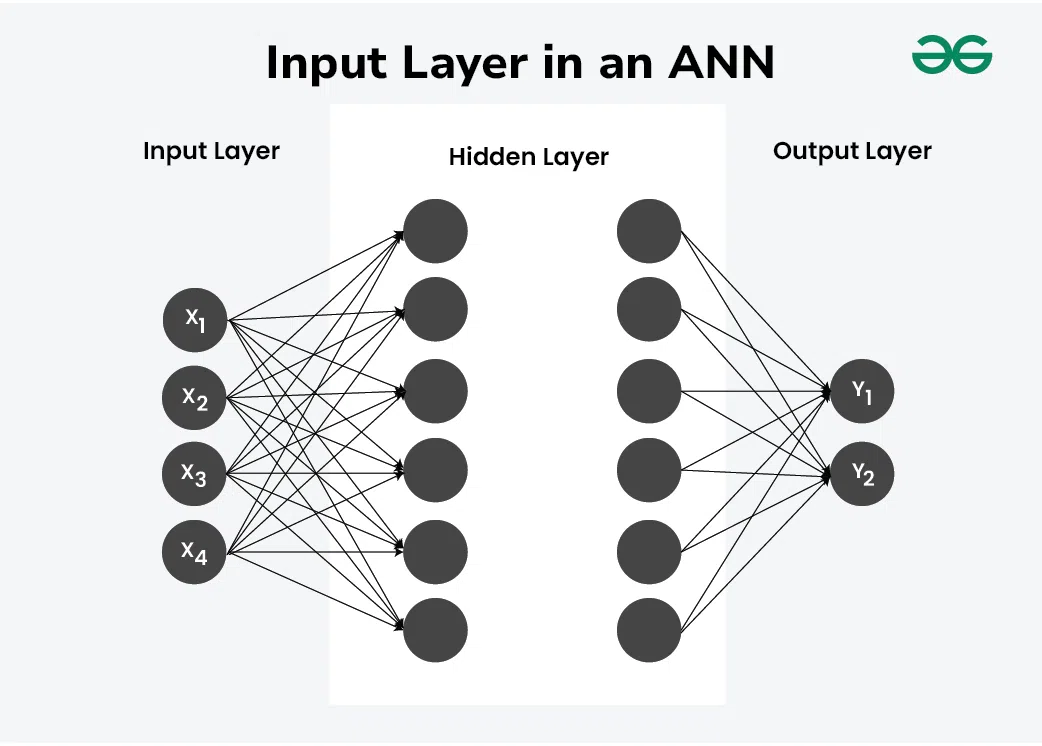

- An ANN has three main parts:

  - Input Layer

    - Takes input features (e.g., pixels of an image)

  - Hidden Layers

    - Perform computations

    - Learn patterns using weights + activation functions

  - Output Layer

    - Gives final prediction (class, value, etc.)

🔹 How a Neuron Works

Each neuron:

- Receives inputs

- Multiplies them by weights

- Adds a bias

- Applies an activation function
  - output=activation(∑(input×weight)+bias)



🔹 Common Activation Functions

- ReLU → Most popular, fast training

- Sigmoid → Probabilities (0–1)

- Tanh → Range (-1, 1)

- Softmax → Multi-class classification

🔹 How ANN Learns

- Forward Propagation → Prediction

- Loss Function → Calculates error

- Backpropagation → Adjusts weights

- Optimizer → Improves accuracy

This process repeats until the model learns well.

🔹 ANN vs CNN
| ANN                     | CNN                |
| ----------------------- | ------------------ |
| Fully connected         | Convolution layers |
| Works on vector data    | Best for images    |
| Less accuracy on images | High accuracy      |


✅ 1-Line Exam Answer

- ANN is a computational model inspired by the human brain that consists of interconnected neurons used for learning and prediction.

## Now ANN-model using Fashion-MNIST Image Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [ ]:
df = pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0.0,7.0,0.0,50.0,205.0,196.0,213.0,165.0,0.0,0.0
1,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,1,0,0,0,...,142.0,142.0,142.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
3,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0,0,0,0,0,0,0,0,0,...,213.0,203.0,174.0,151.0,188.0,10.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(4723, 785)

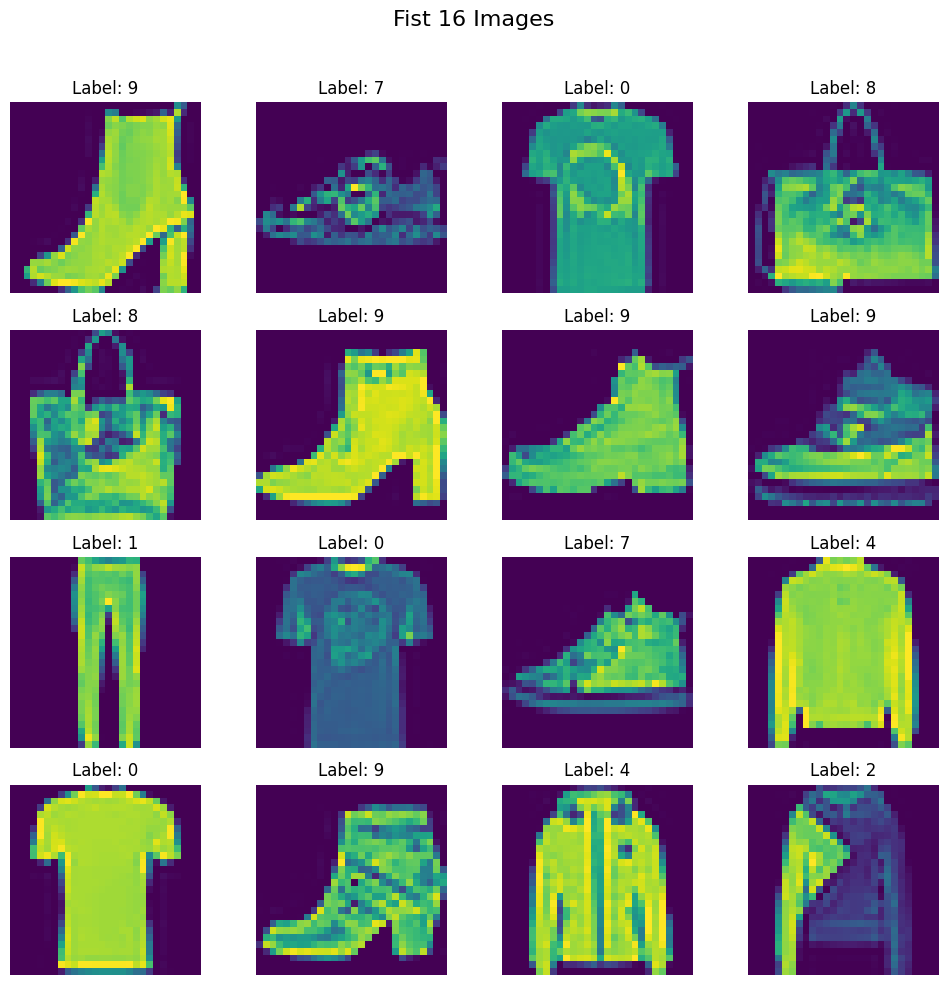

In [ ]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle('Fist 16 Images',fontsize=16)

# Plot the first 16 images from the dataset
for i , ax in enumerate(axes.flat):
    img = df.iloc[i,1:].values.reshape(28,28) # Reshape to 28x28
    ax.imshow(img) # Display in grayscale
    ax.axis('off') # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i,0]}") # Show the label
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show() # Show the plot

In [ ]:
# Train test Split

x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Scaling the feautures
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [ ]:
y_train

array([7, 6, 4, ..., 2, 3, 6])

In [ ]:
# create CustomDataset Class:
class CustomDataset(Dataset):
    def __init__(self,features,labels):
        self.features = torch.tensor(features,dtype=torch.float32)
        self.labels = torch.tensor(labels,dtype=torch.long)
    def __len__(self):
        return len(self.features)
    def __getitem__(self, index):
        return self.features[index], self.labels[index]


In [ ]:
# create train_dataset object
train_dataset = CustomDataset(x_train,y_train)

In [ ]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [ ]:
# create test_dataset object
test_dataset = CustomDataset(x_test,y_test)

In [ ]:
#create train and test loader
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)


In [ ]:
#define NN class
class MY_ANN_Class(nn.Module):
    def __init__(self,num_features):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )
    def forward(self,x):
        return self.model(x)

In [ ]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [ ]:
# instatiate the model
model = MY_ANN_Class(x_train.shape[1])

# loss function
critersion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate)


In [ ]:
len(train_loader)

119

In [ ]:
# training loop
for epoch in range(epochs):
    total_per_epoch_loss = 0
    for batch_idx, (batch_features,batch_labels) in enumerate(train_loader):
        # forward pass
        outputs = model(batch_features)
        #calculate
        loss = critersion(outputs,batch_labels)
        #back pass
        optimizer.zero_grad()
        loss.backward()
        #update
        optimizer.step()

        total_per_epoch_loss += loss.item()
    avg_loss = total_per_epoch_loss/len(train_loader)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

Epoch 1/100, Loss: 1.4284
Epoch 2/100, Loss: 0.8423
Epoch 3/100, Loss: 0.6961
Epoch 4/100, Loss: 0.6225
Epoch 5/100, Loss: 0.5924
Epoch 6/100, Loss: 0.5331
Epoch 7/100, Loss: 0.5057
Epoch 8/100, Loss: 0.4761
Epoch 9/100, Loss: 0.4605
Epoch 10/100, Loss: 0.4606
Epoch 11/100, Loss: 0.4457
Epoch 12/100, Loss: 0.3946
Epoch 13/100, Loss: 0.3831
Epoch 14/100, Loss: 0.5110
Epoch 15/100, Loss: 0.3687
Epoch 16/100, Loss: 0.3553
Epoch 17/100, Loss: 0.3438
Epoch 18/100, Loss: 0.3228
Epoch 19/100, Loss: 0.3139
Epoch 20/100, Loss: 0.3101
Epoch 21/100, Loss: 0.2850
Epoch 22/100, Loss: 0.2800
Epoch 23/100, Loss: 0.2626
Epoch 24/100, Loss: 0.2739
Epoch 25/100, Loss: 0.2533
Epoch 26/100, Loss: 0.2453
Epoch 27/100, Loss: 0.2463
Epoch 28/100, Loss: 0.2549
Epoch 29/100, Loss: 0.2136
Epoch 30/100, Loss: 0.2289
Epoch 31/100, Loss: 0.2053
Epoch 32/100, Loss: 0.1881
Epoch 33/100, Loss: 0.1980
Epoch 34/100, Loss: 0.1943
Epoch 35/100, Loss: 0.2017
Epoch 36/100, Loss: 0.1666
Epoch 37/100, Loss: 0.1752
Epoch 38/1

In [ ]:
# set model to eval mode
model.eval()

MY_ANN_Class(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        _, predicted = torch.max(outputs,1)
        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()
print(f"Accuracy: {100*correct/total}%")

Accuracy: 83.4920634920635%
